In [170]:
#https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [172]:
DataPath = "C:\\Users\\gregl\\Desktop\\ML_Projects\\Housing Price Predictor\\housing.csv"
data = pd.read_csv(DataPath)

In [173]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [175]:
data.dropna(inplace=True)

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [177]:
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [179]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15236,-117.26,32.95,34.0,1651.0,273.0,650.0,271.0,5.6582,NEAR OCEAN,500001.0
10324,-117.77,33.80,16.0,3973.0,483.0,1373.0,452.0,9.8074,<1H OCEAN,417000.0
13476,-117.39,34.09,10.0,5736.0,945.0,3528.0,932.0,4.3958,INLAND,130700.0
5909,-118.43,34.29,38.0,1237.0,298.0,1073.0,293.0,3.6726,<1H OCEAN,154600.0
4701,-118.34,34.07,52.0,3175.0,1057.0,1594.0,997.0,3.1766,<1H OCEAN,225000.0
...,...,...,...,...,...,...,...,...,...,...
15719,-122.44,37.78,39.0,1181.0,310.0,901.0,281.0,1.4866,NEAR BAY,237500.0
17752,-121.83,37.32,21.0,4559.0,1163.0,5124.0,1124.0,3.2052,<1H OCEAN,179000.0
1490,-122.03,37.95,32.0,1955.0,313.0,804.0,317.0,4.9485,NEAR BAY,202300.0
19789,-123.35,40.99,23.0,141.0,59.0,47.0,23.0,1.1250,INLAND,66000.0


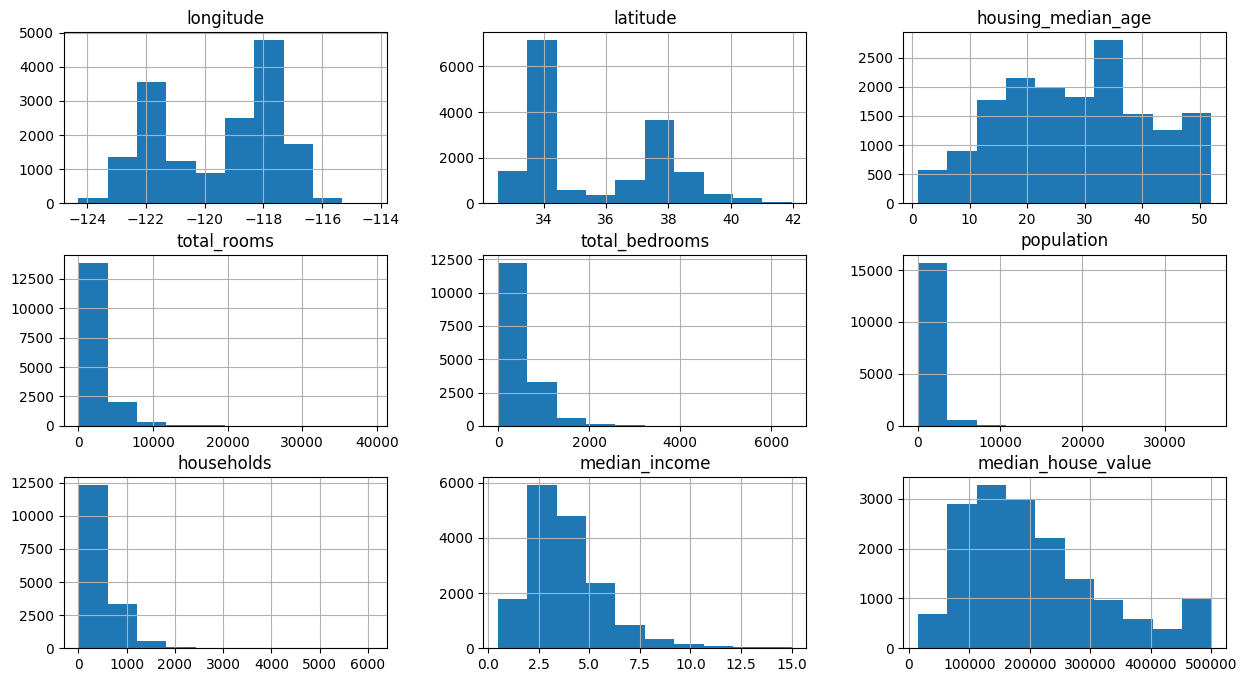

In [180]:
_ = train_data.hist(figsize=(15, 8))

<Axes: >

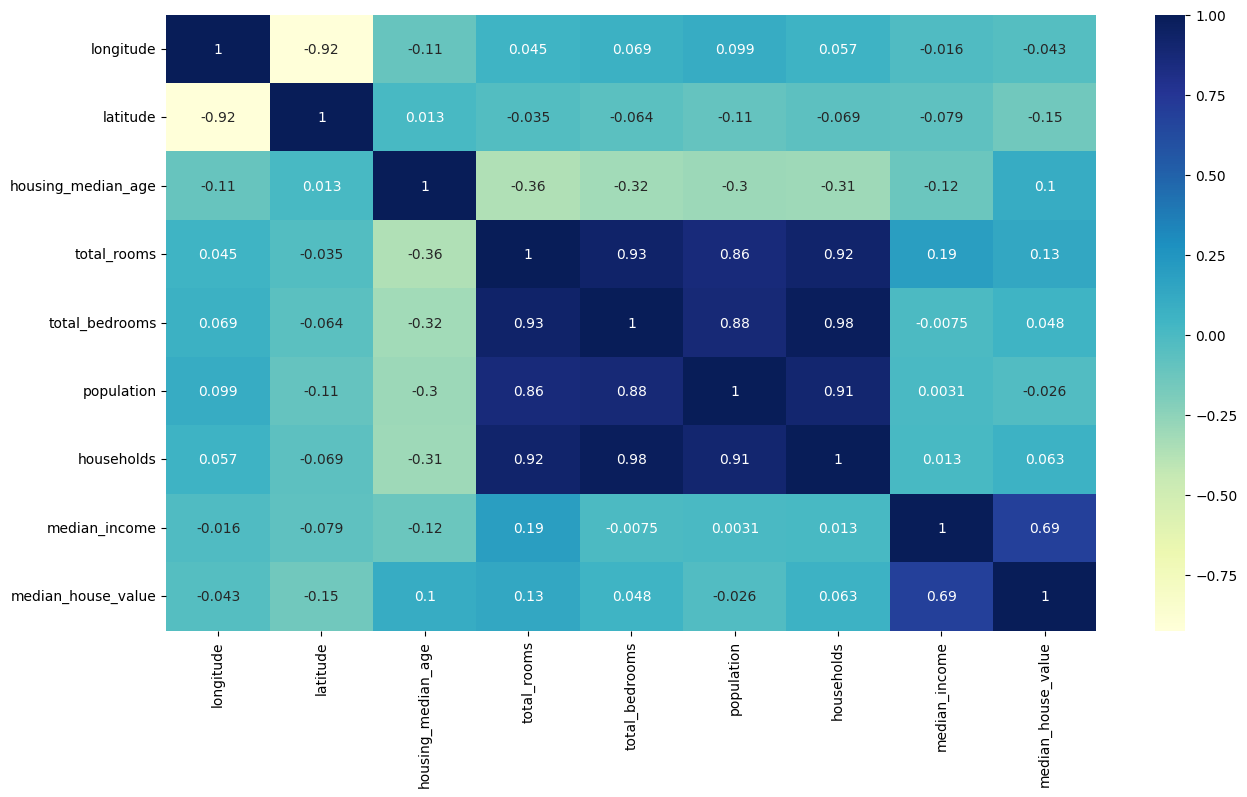

In [181]:
heatmap_data = train_data.drop(['ocean_proximity'], axis=1)
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data.corr(), annot=True, cmap="YlGnBu")

### Pre-processing

In [182]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+ 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+ 1)
train_data['population'] = np.log(train_data['population']+ 1)
train_data['households'] = np.log(train_data['households']+ 1)

In [183]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7240
INLAND        5211
NEAR OCEAN    2095
NEAR BAY      1796
ISLAND           4
Name: count, dtype: int64

In [184]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'], dtype=int)).drop(['ocean_proximity'], axis=1)

<Axes: >

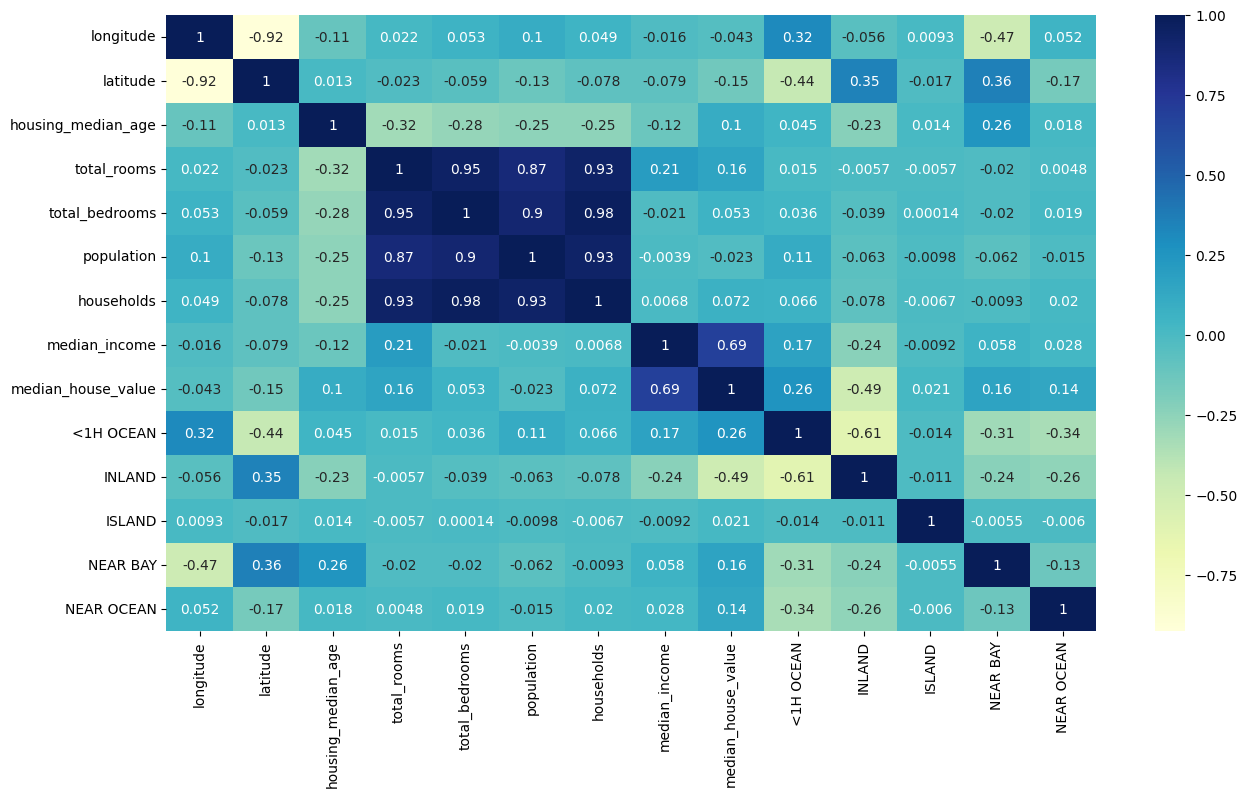

In [185]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

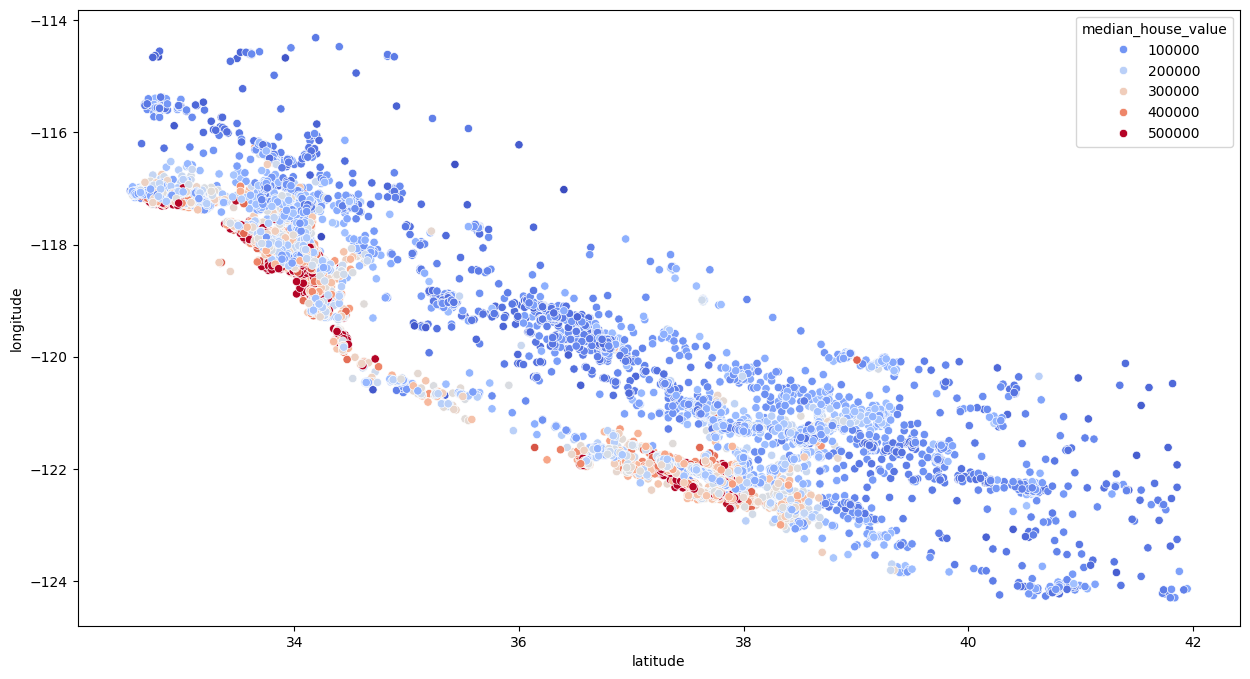

In [186]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')
plt.show()

In [187]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['households_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

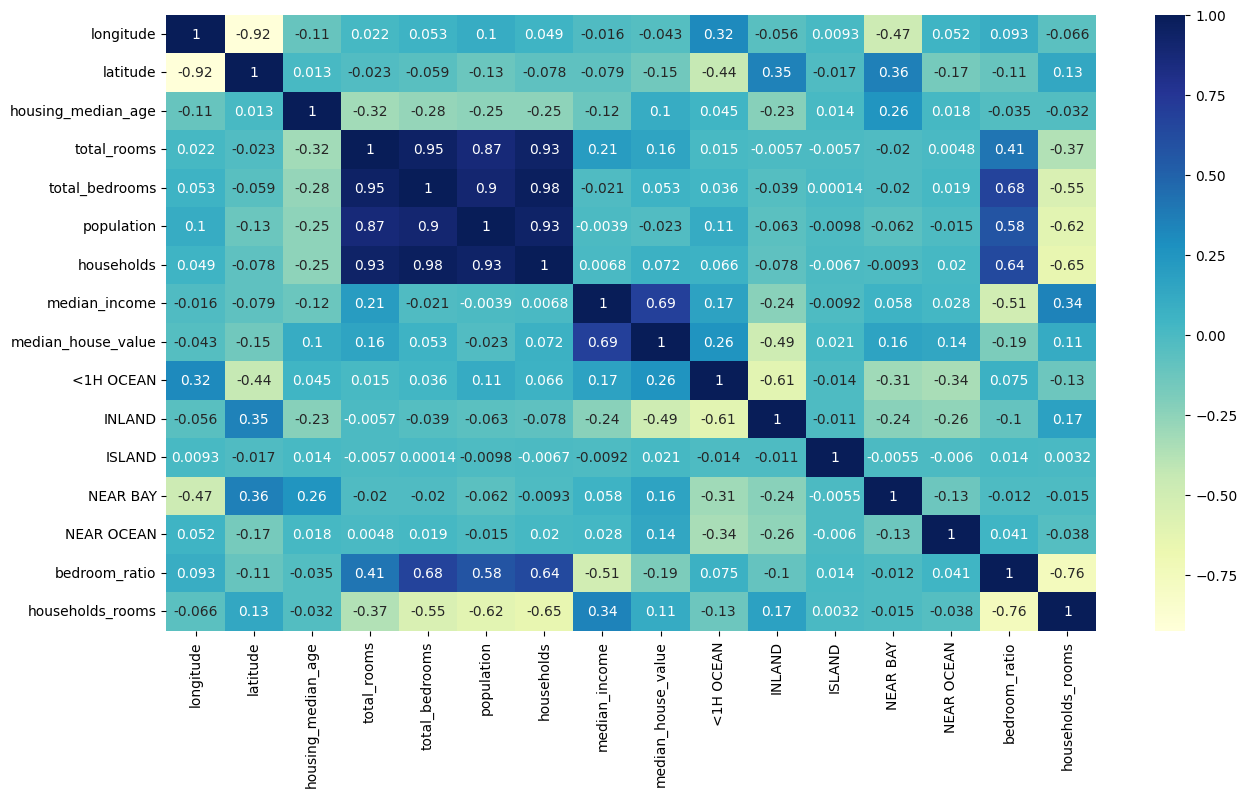

In [188]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

### Buiding our models

In [189]:
scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s= scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression()

In [190]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+ 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+ 1)
test_data['population'] = np.log(test_data['population']+ 1)
test_data['households'] = np.log(test_data['households']+ 1)

test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'], dtype=int)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['households_rooms'] = test_data['total_rooms'] / test_data['households']

In [191]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [192]:
X_test_s = scaler.transform(X_test)

In [193]:
reg.score(X_test_s, y_test)

0.6750649299866855

### Using RandomForestRegressor

In [194]:
forest = RandomForestRegressor()
forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [195]:
forest.score(X_test_s, y_test)

0.8170914052250983

In [196]:
forest = RandomForestRegressor()
param_grid = {
    'n_estimators' : [100, 200, 300],
    'min_samples_split' : [2, 4]
}

grid_search = GridSearchCV(
    estimator = forest,
    param_grid = param_grid,
    cv        = 5,
    scoring   = 'neg_mean_squared_error',
    n_jobs    = -1,
    verbose   = 2
)
grid_search.fit(X_train_s, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [197]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=300)

In [198]:
grid_search.best_estimator_.score(X_test_s, y_test)

0.8182042317465045

In [199]:
y_pred = grid_search.best_estimator_.predict(X_test_s)

In [200]:
results = pd.DataFrame({
    "Actual"      : y_test,
    "Predicted"   : y_pred,
    "Error"       : y_pred - y_test,
    "AbsError"    : np.abs(y_pred - y_test),
    "PctError"    : np.abs(y_pred - y_test) / y_test  # percentage
})
print(results.head())

         Actual      Predicted         Error      AbsError  PctError
7980   164800.0  179330.000000  14530.000000  14530.000000  0.088167
20136  201700.0  216094.370000  14394.370000  14394.370000  0.071365
18563  173200.0  171610.666667  -1589.333333   1589.333333  0.009176
8010   213600.0  217719.010000   4119.010000   4119.010000  0.019284
1701   184000.0  157202.000000 -26798.000000  26798.000000  0.145641


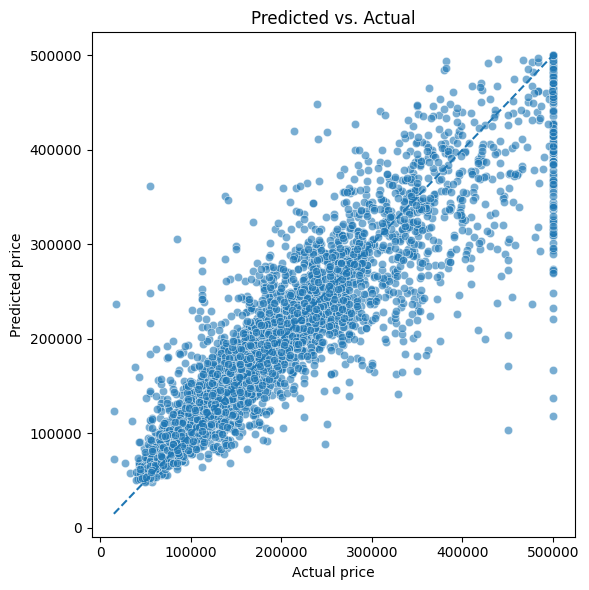

In [201]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], ls='--')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Predicted vs. Actual')
plt.tight_layout()
plt.show()

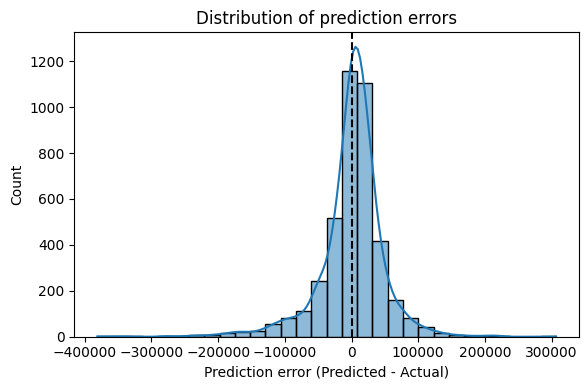

In [202]:
plt.figure(figsize=(6,4))
sns.histplot(results["Error"], bins=30, kde=True)
plt.axvline(0, color='k', ls='--')
plt.title('Distribution of prediction errors')
plt.xlabel('Prediction error (Predicted - Actual)')
plt.tight_layout()
plt.show()

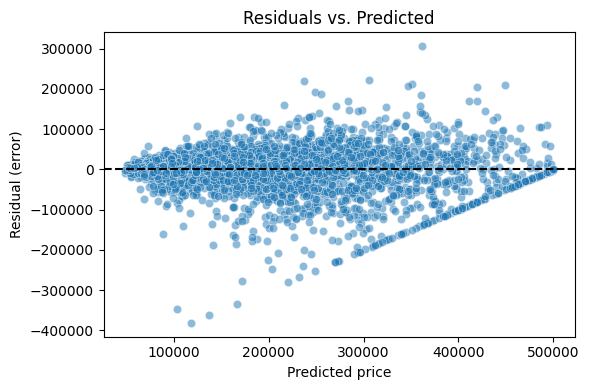

In [203]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=results["Error"], alpha=0.5)
plt.axhline(0, ls='--', color='k')
plt.xlabel('Predicted price')
plt.ylabel('Residual (error)')
plt.title('Residuals vs. Predicted')
plt.tight_layout()
plt.show()

In [205]:
mae  = mean_absolute_error(y_test, y_pred)


mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print(f"MAE  : ${mae:,.0f}")
print(f"MAPE : {mape:.2f}%")

MAE  : $32,437
MAPE : 18.41%
